# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

Input label/class distribution ... 


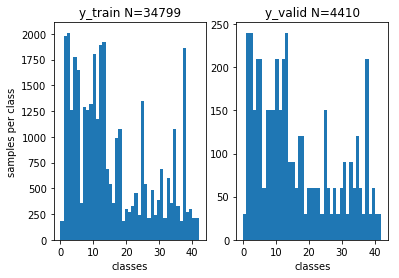

In [90]:
# Load pickled data
import pickle
import numpy as np
import matplotlib.pyplot as plt 

training_file = "./traffic-signs-data/train.p"
validation_file="./traffic-signs-data/valid.p"
testing_file = "./traffic-signs-data/test.p"

# open each pickle file and load datasets
with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

# Get the  features and class labels for training, validation and test set 
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

# Number of unique labels
number_of_classes = len(np.unique(y_train))

# Print the input label distribution
print("Input label/class distribution ... ")
fig, axes = plt.subplots(1, 2)
ax = plt.subplot(1,2,1)
ax.set_title("y_train N=" + str(len(y_train)) )
ax.set_xlabel("classes")
ax.set_ylabel("samples per class")

plt.hist(y_train, bins=number_of_classes)
ax = plt.subplot(1,2,2)
ax.set_title("y_valid N=" + str(len(y_valid)))
ax.set_xlabel("classes")

plt.hist(y_valid, bins=number_of_classes)
plt.show()

data = {'train': (X_train, y_train), 'test': (X_test , y_test), 'valid': (X_valid, y_valid)}


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Dataset Summary using numpy

In [91]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# Number of training examples
n_train = X_train.shape[0]

# Number of validation examples
n_validation = X_valid.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
print("Type of classes =", type(y_train[0]))
print("Min of classes=", np.min(y_train))
print("Max of classes=", np.max(y_train))
print("Min of image=", np.min(X_test[0]))
print("Max of image=", np.max(X_test[0]))

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43
Type of classes = <class 'numpy.uint8'>
Min of classes= 0
Max of classes= 42
Min of image= 6
Max of image= 183


# Exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

### Sample Distribution

Total sample size = 51839
Percent distribution (train, valid, test) =  0.6712899554389552 , 0.08507108547618589 , 0.24363895908485889


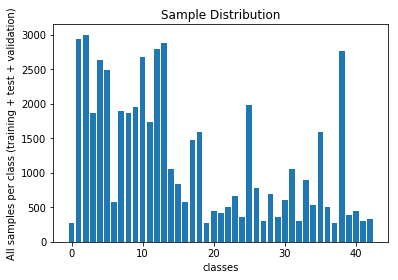

In [92]:
### Data exploration visualization code goes here.
### Number of data points per class. 
import numpy as np
import cv2

total_samples = X_train.shape[0] + X_valid.shape[0] + X_test.shape[0]
print("Total sample size =", total_samples)

percent_train = X_train.shape[0]/total_samples
percent_test  = X_test.shape[0]/total_samples
percent_valid = X_valid.shape[0]/total_samples

print("Percent distribution (train, valid, test) = ", percent_train, ",", percent_valid, ",", percent_test )
# Stack up all data - samples and classes from training, test and validation sets
X = np.vstack((X_train, X_valid, X_test))
y = np.concatenate((y_train, y_valid, y_test))

# Get number of unique class labels
unique_values, unique_indices = np.unique(y_train, return_index=True)
number_of_classes = len(unique_values)

# Get a distribution of number of samples per class
num_samples_per_class = np.zeros(number_of_classes)

# Compute the average of all samples per class
average_image_per_class = np.zeros((number_of_classes, 32, 32, 3))
for idx in range(y.shape[0]):
    num_samples_per_class[y[idx]] += 1
    average_image_per_class[y[idx]] += X[idx]

# Plot per class sample distribution
plt.close('all')
fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(range(number_of_classes), num_samples_per_class)
ax.set_xlabel("classes")
ax.set_ylabel("All samples per class (training + test + validation)")
ax.set_title("Sample Distribution")
plt.show()

In [93]:
# Get all signal names from csv file name
import csv
signals_file_name = "signnames.csv"
signal_names = [None] * number_of_classes;
with open(signals_file_name, 'r') as csvfile:
    is_first_row=1
    spamreader = csv.reader(csvfile, delimiter=',')
    for row in spamreader:
        if len(row) == 0:
            continue;
        if is_first_row==1:
            is_first_row=0
        else:
            signal_names[int(row[0])] = row[1]
print(signal_names)

['Speed limit (20km/h)', 'Speed limit (30km/h)', 'Speed limit (50km/h)', 'Speed limit (60km/h)', 'Speed limit (70km/h)', 'Speed limit (80km/h)', 'End of speed limit (80km/h)', 'Speed limit (100km/h)', 'Speed limit (120km/h)', 'No passing', 'No passing for vehicles over 3.5 metric tons', 'Right-of-way at the next intersection', 'Priority road', 'Yield', 'Stop', 'No vehicles', 'Vehicles over 3.5 metric tons prohibited', 'No entry', 'General caution', 'Dangerous curve to the left', 'Dangerous curve to the right', 'Double curve', 'Bumpy road', 'Slippery road', 'Road narrows on the right', 'Road work', 'Traffic signals', 'Pedestrians', 'Children crossing', 'Bicycles crossing', 'Beware of ice/snow', 'Wild animals crossing', 'End of all speed and passing limits', 'Turn right ahead', 'Turn left ahead', 'Ahead only', 'Go straight or right', 'Go straight or left', 'Keep right', 'Keep left', 'Roundabout mandatory', 'End of no passing', 'End of no passing by vehicles over 3.5 metric tons']


### Class Representation Analysis

In [94]:
# Generate statistics on min vs max represented class

# Get class labels with minimum and maximum samples 
# and mean number of samples across all classes
min_examples = np.min(num_samples_per_class)
max_examples = np.max(num_samples_per_class)
mean_examples = np.mean(num_samples_per_class)

print("minimum examples per class =", min_examples)
print("maximum examples per class =", max_examples)
print("mean number of examples across all classes=", mean_examples)

# Find the class names that map to the min/max sample class ids 
min_represented_classes = np.where(num_samples_per_class == min_examples)
min_classes = min_represented_classes[0]

max_represented_classes = np.where(num_samples_per_class == max_examples)
max_classes = max_represented_classes[0]


min_signals = [signal_names[idx] for idx in min_classes]
print("Class with min samples =", min_signals)

max_signals = [signal_names[idx] for idx in max_classes]
print("Class with max samples =", max_signals)

minimum examples per class = 270.0
maximum examples per class = 3000.0
mean number of examples across all classes= 1205.55813953
Class with min samples = ['Speed limit (20km/h)', 'Dangerous curve to the left', 'Go straight or left']
Class with max samples = ['Speed limit (50km/h)']


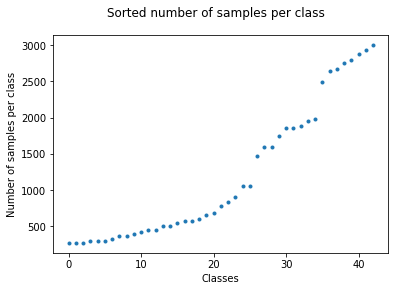

In [95]:
# Plot trend of number of samples per class
fig = plt.figure()
plt.plot(range(number_of_classes), sorted(num_samples_per_class), '.')
fig.suptitle('Sorted number of samples per class')
plt.xlabel('Classes')
plt.ylabel('Number of samples per class')
plt.show()


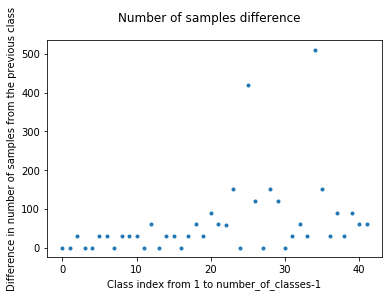

Max delta =  510.0
Second Max delta =  420.0


In [96]:
# Plot the difference in the number of samples given a sorted sequence of classes based on the number of samples per class
sorted_values = sorted(num_samples_per_class)
sorted_indices = np.argsort(num_samples_per_class)

delta_values = [sorted_values[idx]-sorted_values[idx-1] for idx in range(1,len(sorted_values))]

fig = plt.figure()
plt.plot(range(number_of_classes-1), delta_values, '.')
fig.suptitle('Number of samples difference')
plt.xlabel('Class index from 1 to number_of_classes-1')
plt.ylabel('Difference in number of samples from the previous class')
plt.show()

sorted_delta_values = sorted(delta_values, reverse=True)

print("Max delta = ", sorted_delta_values[0])
print("Second Max delta = ", sorted_delta_values[1])


### Mean Representative Analysis
In order to understand how all the images for a given class are representing the class, an simple experiment of adding all images that belong to a class and averaging the image over number of samples is done. 

The class representative "average / mean images" are then visualized

C:\Users\Vaidehi\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


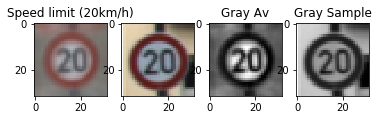

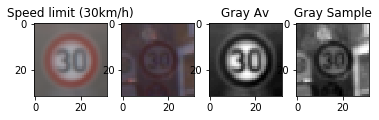

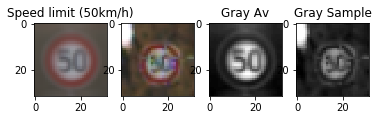

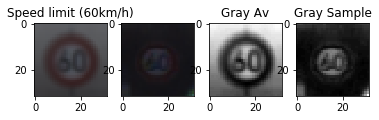

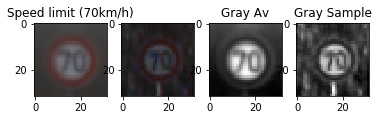

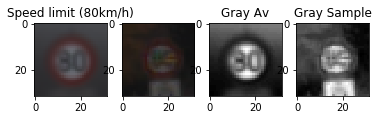

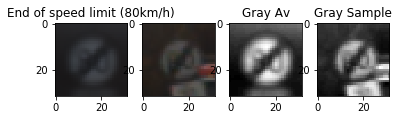

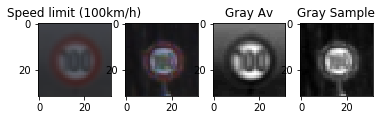

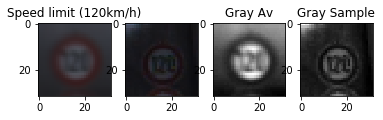

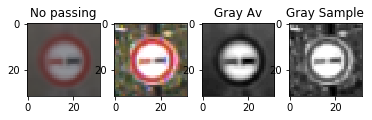

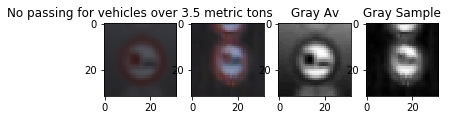

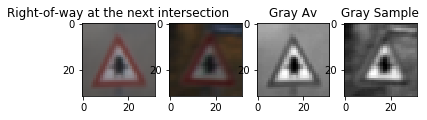

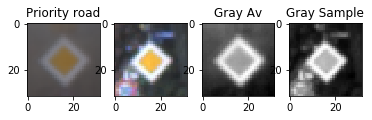

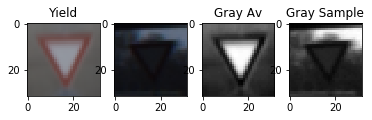

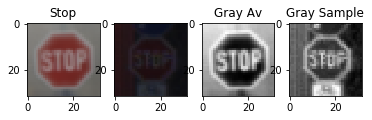

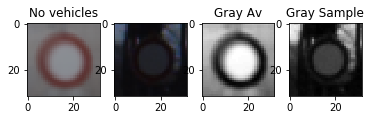

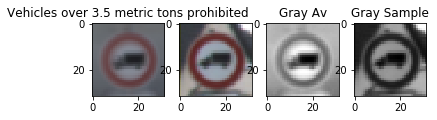

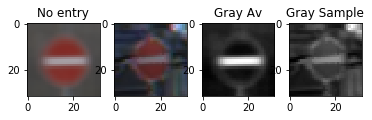

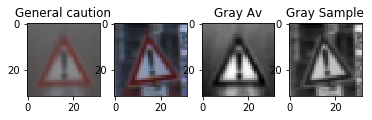

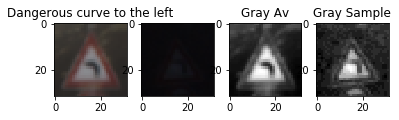

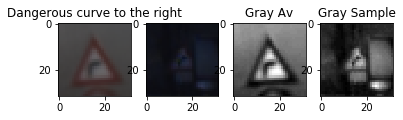

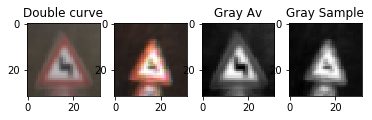

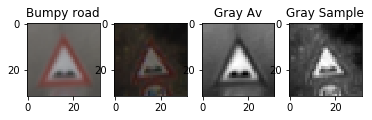

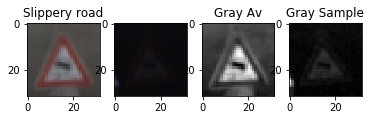

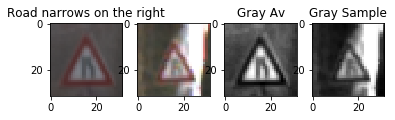

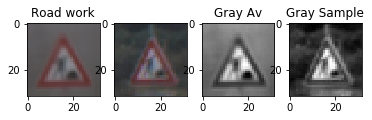

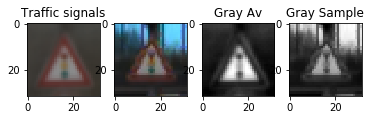

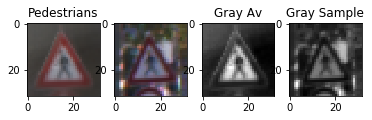

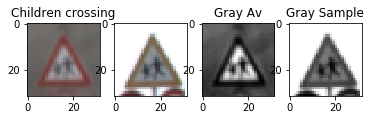

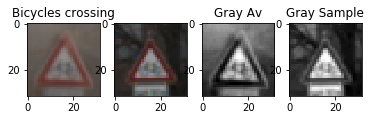

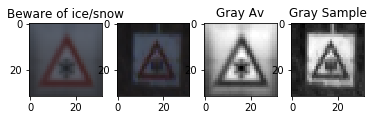

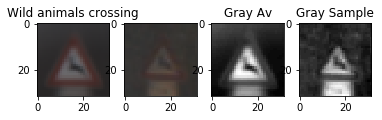

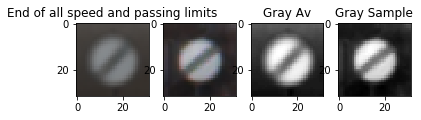

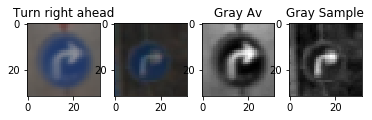

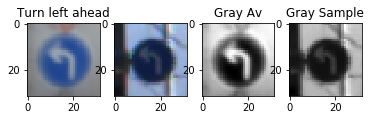

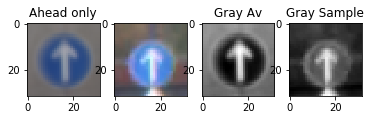

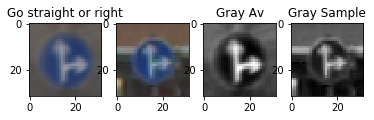

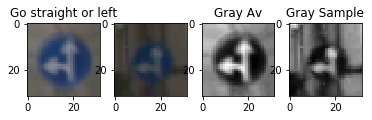

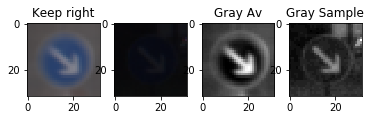

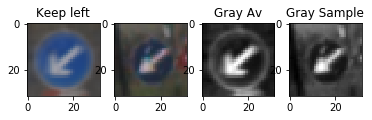

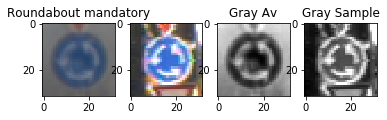

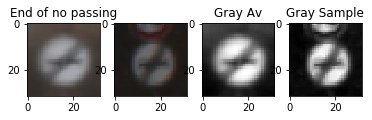

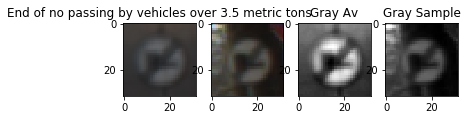

In [92]:
# Average over all images per class, 
# For each class, plot a sample image, averaged image and their corresponding grayscales
for idx in range(number_of_classes):
    average_image = average_image_per_class[idx]
    average_image = average_image/num_samples_per_class[idx]
    average_image = average_image.astype('uint8')
    
    # Plot average sample representation of the class
    fig, axes = plt.subplots(1, 4)
    ax = plt.subplot(1, 4, 1)
    ax.set_title(signal_names[idx])
    ax.imshow(average_image)
         
    # Plot a sample image from the class
    ax = plt.subplot(1, 4, 2)
    ax.imshow(X[unique_indices[idx]])
    
    # Convert the average representation to gray scale
    gray = cv2.cvtColor(average_image, cv2.COLOR_RGB2GRAY)
    ax = plt.subplot(1, 4, 3)
    ax.set_title("Gray Av")
    ax.imshow(gray, cmap="gray")
    
    # Plot sample image to gray scale
    ax = plt.subplot(1, 4, 4)
    ax.set_title("Gray Sample")
    gray_sample = cv2.cvtColor(X[unique_indices[idx]], cv2.COLOR_RGB2GRAY)
    ax.imshow(gray_sample, cmap="gray")
     
plt.show()


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

### Image augmentation

The following cells are defining different geometric transformation algorithms that one can apply on an image to create a new image. 


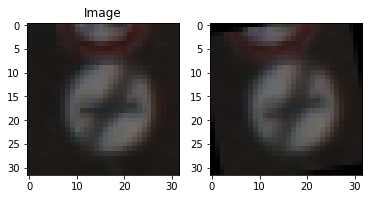

In [97]:
# Rotate images by -10degrees
import matplotlib.pyplot as plt
import cv2
def rotateImage(image, angle):
    image_center = tuple(np.array(image.shape)/2)
    rot_mat = cv2.getRotationMatrix2D((image_center[0], image_center[1]),angle, 1)
    rotated_image = cv2.warpAffine(image, rot_mat, (image.shape[0], image.shape[1]),flags=cv2.INTER_LINEAR)
    return rotated_image

image = X_train[0]
rotated_image = rotateImage(image, 10)


fig, axes = plt.subplots(1, 2)
ax = plt.subplot(1, 2, 1)
ax.set_title("Image")
ax.imshow(image)

# Plot a sample image from the class
ax = plt.subplot(1, 2, 2)
ax.imshow(rotated_image)

plt.show()

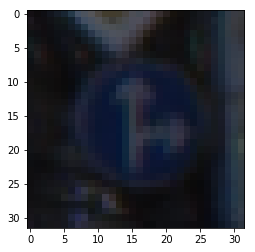

TypeError: translateImage() missing 1 required positional argument: 'tfactor'

In [98]:
import cv2
def translateImage(image, tfactor):
    rows,cols, channel = image.shape
    M = np.float32([[1,0, int(tfactor*rows)],[0,1, int(tfactor*cols)]])
    translated_image = cv2.warpAffine(image, M, (cols,rows))
    return translated_image

image = X_train[1002]
plt.imshow(image)
plt.show()

translated_image = translateImage(image)
plt.imshow(translated_image)
plt.show()

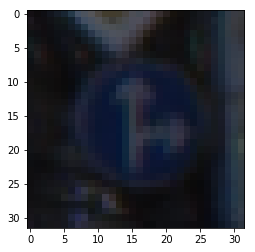

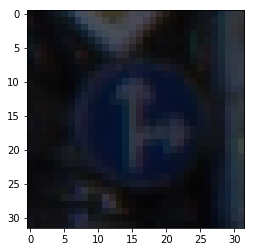

In [99]:
def reduceBrightness(image, pixel_value):
    reduced_brightness_image = image[:,:,:] - pixel_value
    return reduced_brightness_image

img = X_train[1002]
reduced_brightness = reduceBrightness(image, 5)

rows,cols, t = img.shape
plt.imshow(img)
plt.show()

plt.imshow(reduced_brightness)
plt.show()

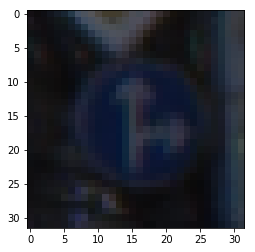

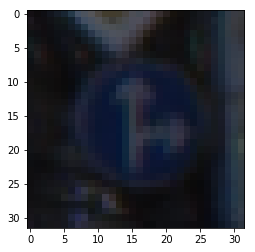

In [100]:
def lossyResize(img):
    resized_image = cv2.resize(img, (16,16))
    dst = cv2.resize(img, (32,32))
    return dst

img = X_train[1002]
rows,cols, t = img.shape
plt.imshow(img)
plt.show()

dst = lossyResize(img)
plt.imshow(dst)
plt.show()
            

23


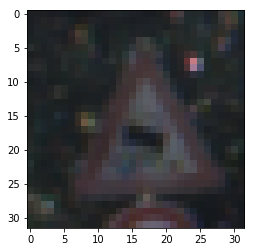

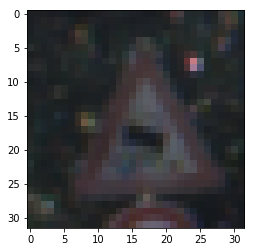

In [108]:
# Define a pipeline of image transformations 
from random import randint

def augment_image(image):
    rotation_angles = [-10, -5, 0, 5, 10]
    translation_factors = [-0.1, 0, 0.1]
    pixel_values = [-5, 0, 5]
    
    rotation_index = randint(0, len(rotation_angles)-1)
    translation_index = randint(0, len(translation_factors)-1)
    pixel_index = randint(0, len(pixel_values)-1)
    
    doRotateImage = randint(0, 1);
    doTranslateImage = randint(0, 1);
    doReduceBrightness = randint(0, 1);
    doLossyResize = randint(0, 1);
    
    if doRotateImage == 1:
        image = rotateImage(image, rotation_angles[rotation_index])
    
    if doTranslateImage == 1:
        image = translateImage(image, translation_factors[translation_index])
    
    if doReduceBrightness == 1:
        image = reduceBrightness(image, pixel_values[pixel_index])
    
    if doLossyResize == 1:
        image = lossyResize(image)
    
    return image
    

img = X_train[1999]
print(y_train[1999])
plt.imshow(img)
plt.show()

dst = augment_image(img)
plt.imshow(dst)
plt.show()

Number of images added =  26369


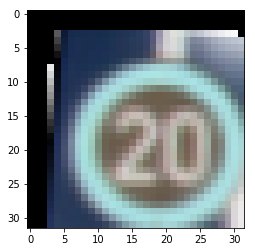

In [103]:
# Compute the number of samples per class required to increase the class representation to mean of 1200 images 
samples_required_per_class = mean_examples - num_samples_per_class
new_X = [];
new_y = [];
for idx in range(number_of_classes):
    if samples_required_per_class[idx] > 0:
        augmentation_factor = int(samples_required_per_class[idx]/num_samples_per_class[idx]) + 1
        find_index_result = np.where(y == idx);
        class_sample_indices = find_index_result[0];
        for idy in range(len(class_sample_indices)):
            image = X[class_sample_indices[idy]]
            for idz in range(augmentation_factor):
                augmented_image = augment_image(image)
                new_X.append(augmented_image)
                new_y.append(idx)

new_X = np.array(new_X)
new_y = np.array(new_y)


print("Number of images added = ", new_X.shape[0])
fig = plt.figure()
plt.imshow(new_X[0])
plt.show()


### Preserving Original Train-Test-Valid split
After dataset is augmented with new images, all images are again split to the original train, test and validation dataset ratio 


In [109]:

print("Percent distribution (train, valid, test) = ", percent_train, ",", percent_valid, ",", percent_test )
# Stack up all data - samples and classes from training, test and validation sets
X = np.vstack((X, new_X))
y = np.concatenate((y, new_y))

# Split the data into training and validation dataset
indices = np.arange(X.shape[0])
np.random.shuffle(indices)

training_samples = int(np.ceil(X.shape[0]*percent_train))
validation_samples = int(np.ceil(X.shape[0]*percent_valid))
training_indices, validation_indices, test_indices = indices[:training_samples], indices[training_samples:training_samples+validation_samples], indices[training_samples+validation_samples:]

X_train, y_train = X[training_indices, :,:,:], y[training_indices]
X_valid, y_valid = X[validation_indices, :,:,:], y[validation_indices]
X_test, y_test = X[test_indices, :,:,:], y[test_indices]

new_total_samples = X_train.shape[0] + X_valid.shape[0] + X_test.shape[0]
new_percent_train = X_train.shape[0]/new_total_samples
new_percent_test =  X_test.shape[0]/new_total_samples
new_percent_valid = X_valid.shape[0]/new_total_samples

print("Percent distribution after augmentation(train, valid, test) = ", new_percent_train, ",", new_percent_valid, ",", new_percent_test )

Percent distribution (train, valid, test) =  0.6712899554389552 , 0.08507108547618589 , 0.24363895908485889
Percent distribution after augmentation(train, valid, test) =  0.6712996112929623 , 0.08508081014729951 , 0.24361957855973815


### Dataset summary of the augmented dataset 

Total sample size = 78208
Percent distribution (train, valid, test) =  0.6712996112929623 , 0.08508081014729951 , 0.24361957855973815


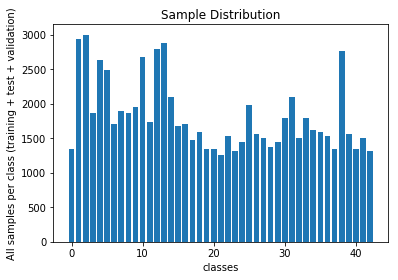

In [110]:
### Number of data points per class. 
import numpy as np
import cv2

total_samples = X_train.shape[0] + X_valid.shape[0] + X_test.shape[0]
print("Total sample size =", total_samples)

percent_train = X_train.shape[0]/total_samples
percent_test  = X_test.shape[0]/total_samples
percent_valid = X_valid.shape[0]/total_samples

print("Percent distribution (train, valid, test) = ", percent_train, ",", percent_valid, ",", percent_test )
# Stack up all data - samples and classes from training, test and validation sets
X = np.vstack((X_train, X_valid, X_test))
y = np.concatenate((y_train, y_valid, y_test))

# Get number of unique class labels
unique_values, unique_indices = np.unique(y_train, return_index=True)
number_of_classes = len(unique_values)

# Get a distribution of number of samples per class
num_samples_per_class = np.zeros(number_of_classes)

# Compute the average of all samples per class
average_image_per_class = np.zeros((number_of_classes, 32, 32, 3))
for idx in range(y.shape[0]):
    num_samples_per_class[y[idx]] += 1
    average_image_per_class[y[idx]] += X[idx]

# Plot per class sample distribution
plt.close('all')
fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(range(number_of_classes), num_samples_per_class)
ax.set_xlabel("classes")
ax.set_ylabel("All samples per class (training + test + validation)")
ax.set_title("Sample Distribution")
plt.show()

In [111]:
# Generate statistics on min vs max represented class

# Get class labels with minimum and maximum samples 
# and mean number of samples across all classes
min_examples = np.min(num_samples_per_class)
max_examples = np.max(num_samples_per_class)
mean_examples = np.mean(num_samples_per_class)

print("minimum examples per class =", min_examples)
print("maximum examples per class =", max_examples)
print("mean number of examples across all classes=", mean_examples)

# Find the class names that map to the min/max sample class ids 
min_represented_classes = np.where(num_samples_per_class == min_examples)
min_classes = min_represented_classes[0]

max_represented_classes = np.where(num_samples_per_class == max_examples)
max_classes = max_represented_classes[0]


min_signals = [signal_names[idx] for idx in min_classes]
print("Class with min samples =", min_signals)

max_signals = [signal_names[idx] for idx in max_classes]
print("Class with max samples =", max_signals)

minimum examples per class = 1260.0
maximum examples per class = 3000.0
mean number of examples across all classes= 1818.79069767
Class with min samples = ['Double curve']
Class with max samples = ['Speed limit (50km/h)']


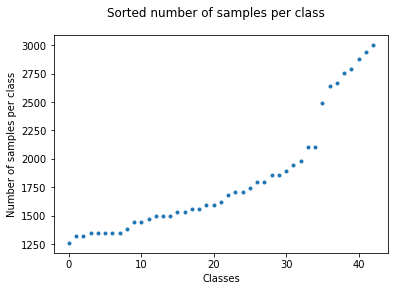

In [112]:
# Plot trend of number of samples per class
fig = plt.figure()
plt.plot(range(number_of_classes), sorted(num_samples_per_class), '.')
fig.suptitle('Sorted number of samples per class')
plt.xlabel('Classes')
plt.ylabel('Number of samples per class')
plt.show()


### Grayscale and histogram equalization of images 

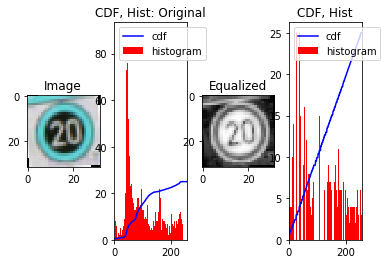

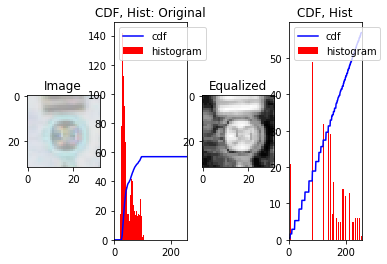

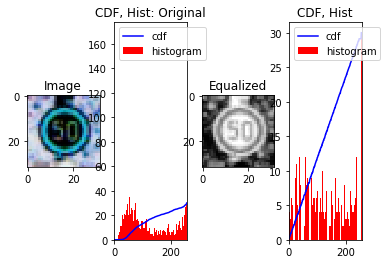

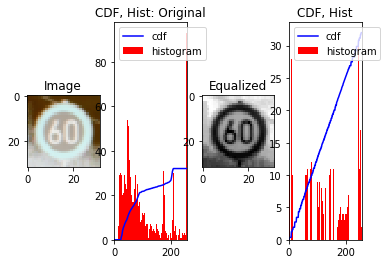

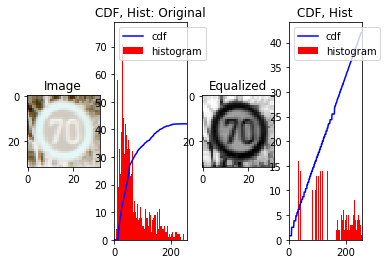

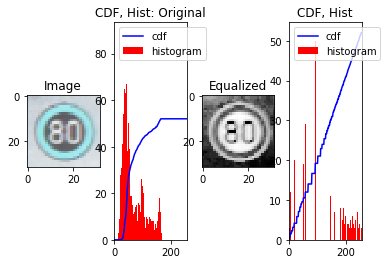

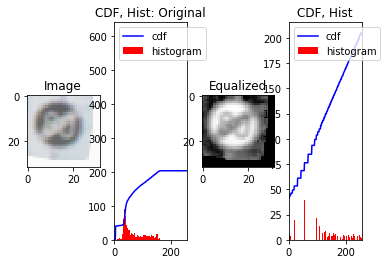

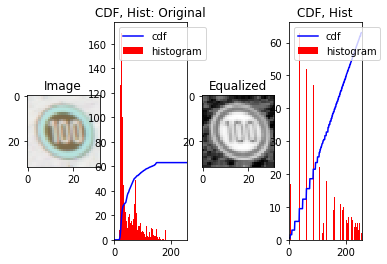

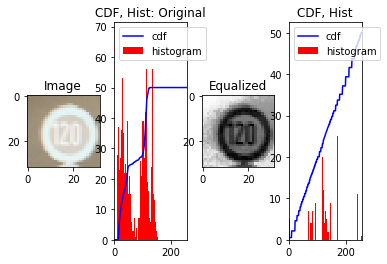

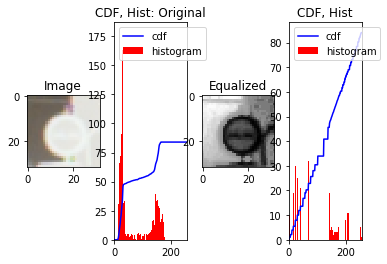

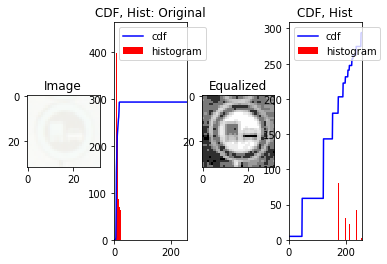

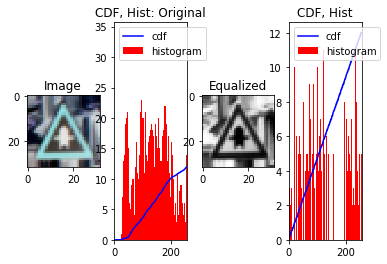

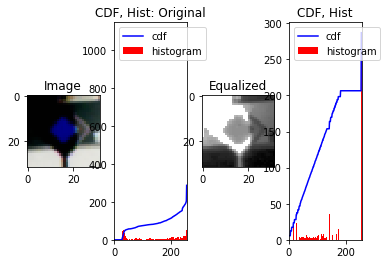

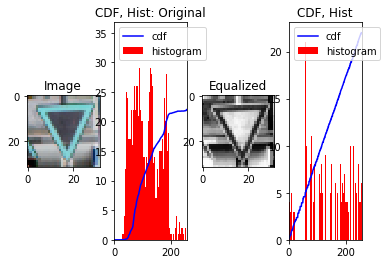

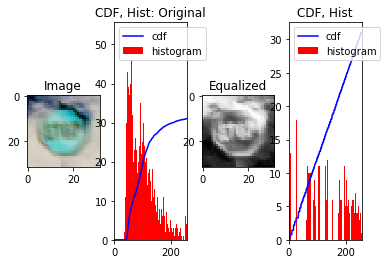

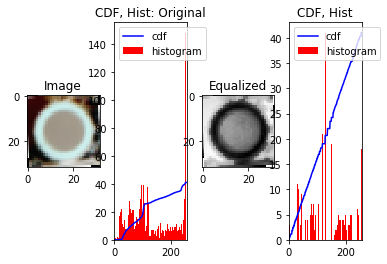

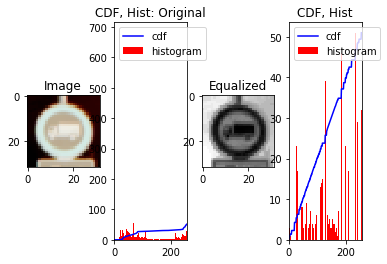

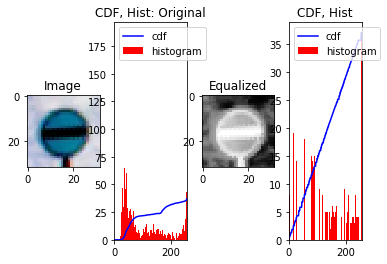

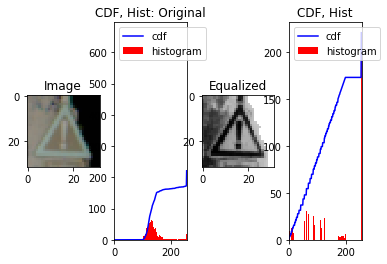

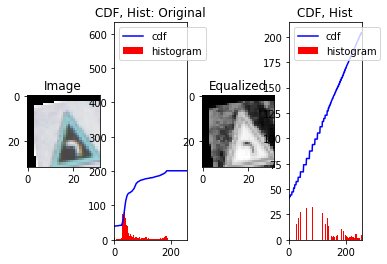

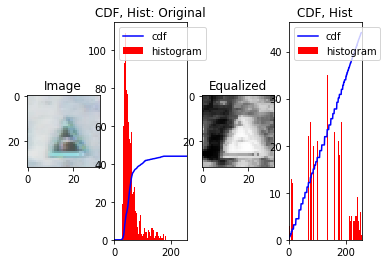

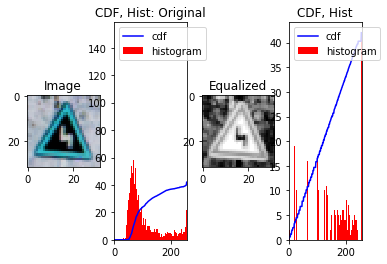

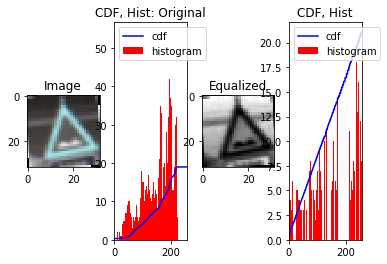

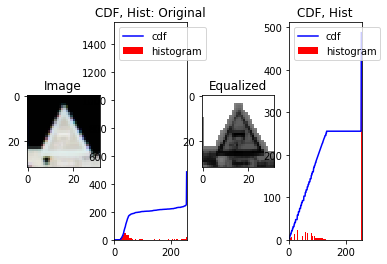

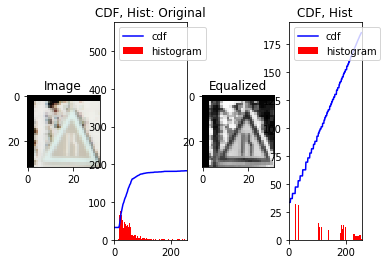

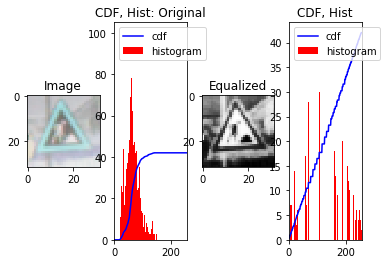

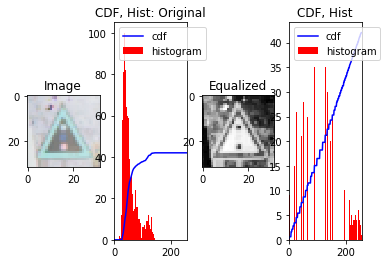

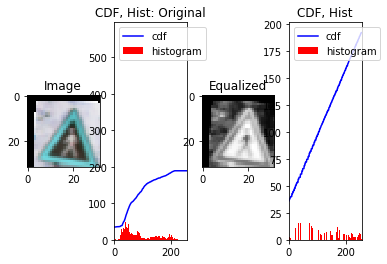

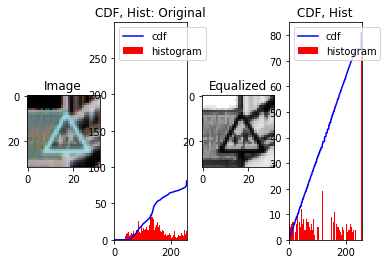

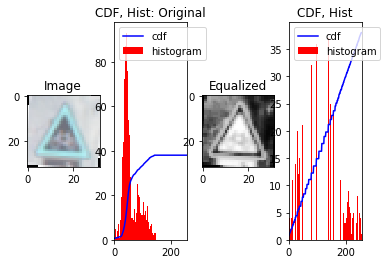

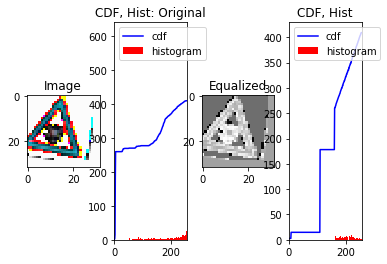

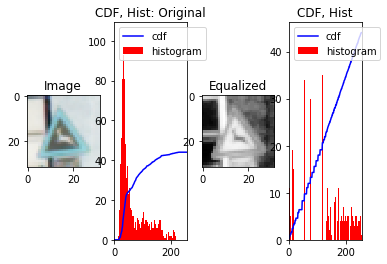

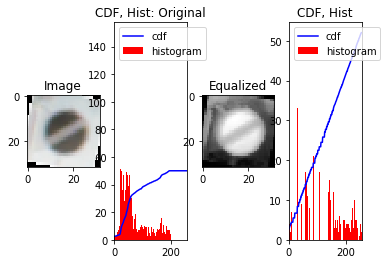

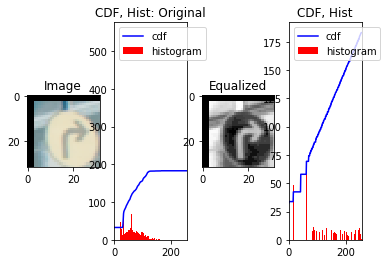

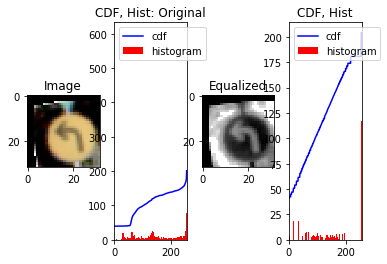

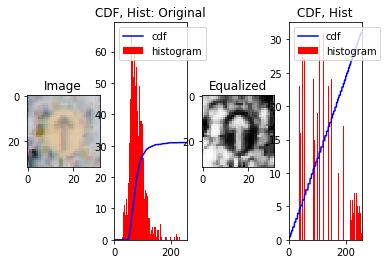

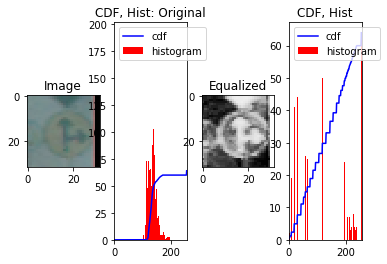

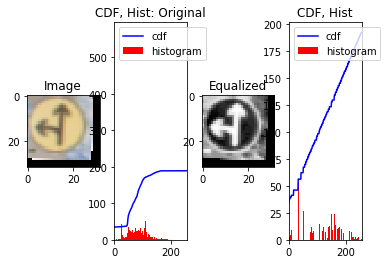

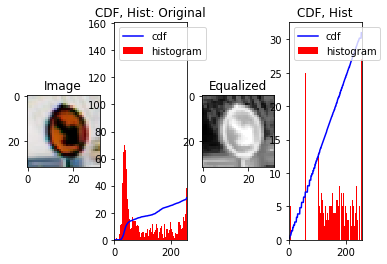

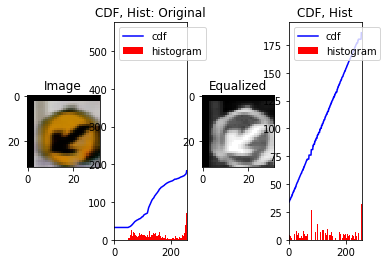

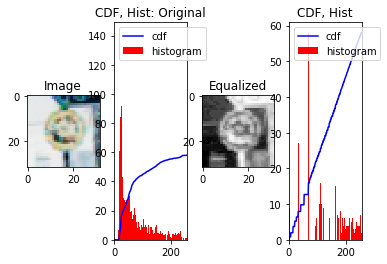

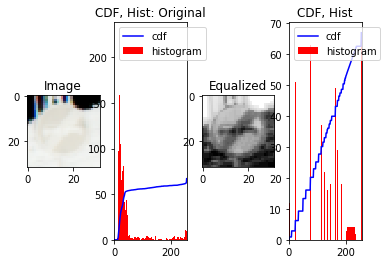

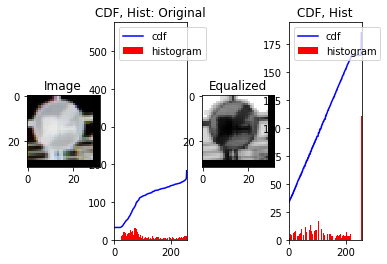

In [113]:
### Histogram Equalization
import matplotlib.pyplot as plt
import numpy as np
import cv2
from numpy import newaxis
# Sharpen images using histogram equalization

def computeCDF(image):
    # Compute cumlative distribution function using histogram binning of values 
    hist, bins = np.histogram(image.flatten(), 256, [0, 256])
    cdf = hist.cumsum()
    
    #Normalize cdf 
    cdf_normalized = cdf * hist.max()/cdf.max()
    return cdf_normalized

def equalizeImage(image, cdf):
    # Equalize image by normalizing the values and applying a mask 
    cdf_m = np.ma.masked_equal(cdf,0)
    cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
    cdf_equ = np.ma.filled(cdf_m, 0).astype('uint8')
    image_equ = cdf_equ[image]
    return image_equ

def process_image(image):
    # Compute histogram equalization on the grayscale of an image 
    # Compute cdf on the equalized image
    image = np.array(image, dtype=np.uint8)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    cdf = computeCDF(image)
    equalized_image = equalizeImage(image, cdf)
    cdf_equ = computeCDF(equalized_image)
    return image, cdf, equalized_image, cdf_equ
    
def process_image_for_nn(image):
    # Helper API to sharpen an image using histogram equalization
    # To be used in preprocessing step
    image = np.array(image, dtype=np.uint8)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    cdf = computeCDF(image)
    equalized_image = equalizeImage(image, cdf)
    return equalized_image[:,:,newaxis]

# Visualizations will be shown in the notebook.
%matplotlib inline
unique_values, unique_indices = np.unique(y_train, return_index=True)

# For each class, get a sample image from the class and visually present the 
# result of histogram equalization
for idx in range(len(unique_values)):
    image = X_train[unique_indices[idx]]
    other_image, cdf, equalized_image, cdf_equ = process_image(image)
    fig, axes = plt.subplots(1, 4)
    ax = plt.subplot(1, 4, 1)
    ax.set_title("Image")
    plt.imshow(image)

    ax = plt.subplot(1, 4, 2)
    ax.set_title("CDF, Hist: Original")
    plt.plot(cdf, color="b")
    plt.hist(image.flatten(), 256, [0, 256], color = "r")
    plt.xlim([0, 256])
    plt.legend(('cdf', 'histogram'), loc="upper left")
    
    
    ax = plt.subplot(1, 4, 3)
    ax.set_title("Equalized")
    plt.imshow(equalized_image, cmap='gray')
    
    ax = plt.subplot(1, 4, 4)
    ax.set_title("CDF, Hist")
    plt.plot(cdf_equ, color="b")
    plt.hist(equalized_image.flatten(), 256, [0, 256], color = "r")
    plt.xlim([0, 256])
    plt.legend(('cdf', 'histogram'), loc="upper left")
    
    plt.show()


### Reshuffle data to create a uniform distribution of training set 
In order to get a good (similar) distribution of classes in training and validation sets, combine the training and validation sets and reshuffle the data.



Reshuffled data distribution


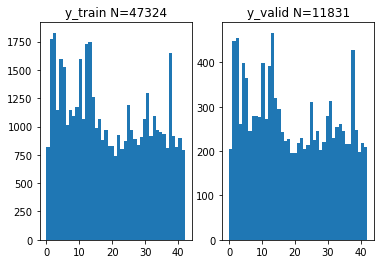

In [114]:
# Shuffle data to ensure there is a 80-20 split of training & validation datasets

# Combine training and validation datasets 
X = np.vstack((X_train, X_valid))
y = np.concatenate((y_train, y_valid))

# Process all images to gray scale and sharpen the image
# via histogram equalization
X_gray = np.zeros((X.shape[0], 32, 32, 1))
for idx in range(X.shape[0]):
    X_gray[idx] = process_image_for_nn(X[idx])

# Split the data into training and validation dataset
indices = np.arange(X.shape[0])
np.random.shuffle(indices)
training_samples = int(np.ceil(X.shape[0]*0.8))
training_indices, validation_indices = indices[:training_samples], indices[training_samples:]

X_train, y_train = X_gray[training_indices, :,:,:], y[training_indices]
X_valid, y_valid = X_gray[validation_indices, :,:,:], y[validation_indices]

# Print the data distribution
print("Reshuffled data distribution")
fig, axes = plt.subplots(1, 2)
ax = plt.subplot(1,2,1)
ax.set_title("y_train N=" + str(len(y_train)))
plt.hist(y_train, bins=43)

ax = plt.subplot(1,2,2)
ax.set_title("y_valid N=" + str(len(y_valid)))
plt.hist(y_valid, bins=43)
plt.show()

data["train"] = (X_train, y_train)

data["valid"] = (X_valid, y_valid)

total_training_samples = X_train.shape[0] + X_valid.shape[0]


In [115]:
# Process all test images to apply the same preprocessing steps as the training
# and validation sets 
X_gray_test = np.zeros((X_test.shape[0], 32,32,1))
for idx in range(X_test.shape[0]):
    X_gray_test[idx] = process_image_for_nn(X_test[idx])


### Model Architecture

In [122]:
# Define model architecture for CNN to identify traffic signals 
import tensorflow as tf
from tensorflow.contrib.layers import flatten

### Define your architecture here.
### Feel free to use as many code cells as needed.
def getLeNet(x, dropout):
    mu = 0
    sigma = 0.1

    # Define a Convolutional Layer with filter sizes of 5x5 and 6 output nodes 
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5,5,1,6), mean=mu, stddev=sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1 = tf.nn.conv2d(x, conv1_W, strides=[1,1,1,1], padding="VALID") +  conv1_b
    
    # Apply relu activation function
    conv1 = tf.nn.relu(conv1)
    
    # Apply a maxpooling layer with filter sizes of 2x2
    conv1 = tf.nn.max_pool(conv1, ksize=[1,2,2,1], strides=[1,2,2,1], padding="VALID")

    # Define the second Convolution Layer with filter sizes of 5x5 and 16 output nodes
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5,5,6,16), mean=mu, stddev=sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.conv2d(conv1, conv2_W, strides=[1,1,1,1], padding="VALID") + conv2_b
    
    # Apply relu activation function 
    conv2 = tf.nn.relu(conv2)
    
    # Apply a max pooling layer with filter sizes of 2x2
    conv2 = tf.nn.max_pool(conv2, ksize=[1,2,2,1], strides=[1,2,2,1], padding="VALID")

    # Flatten the output of convolutional layer to get 400 output nodes
    fc0   = flatten(conv2)

    # Use fully connected layers with 120 output nodes
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean=mu, stddev=sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1 = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Use relu activation function 
    fc1 = tf.nn.relu(fc1)

    # Use fully connected layers with 84 output nodes 
    fc2_W = tf.Variable(tf.truncated_normal(shape=(120, 84), mean=mu, stddev=sigma))
    fc2_b = tf.Variable(tf.zeros(84))
    fc2 = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Use relu activation function 
    fc2 = tf.nn.relu(fc2)
    
    # Apply a dropout layer before giving inputs to the final layer 
    fc2 = tf.nn.dropout(fc2, dropout)

    # Use fully connected layer with 43 output nodes mapping to the number of class labels 
    fc3_W = tf.Variable(tf.truncated_normal(shape=(84, 43), mean=mu, stddev=sigma))
    fc3_b = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    # return logits as output layer 
    return logits


# Define learning_rate, dropout, epochs and batch sizes
learning_rate=0.001
dropout = 0.9
epochs = 20
batch_size=128

# Define input placeholders 
x = tf.placeholder(tf.float32, (None, 32,32,1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
keep_prob = tf.placeholder(tf.float32, (None))

# get logits from leNet
leNet = getLeNet(x, keep_prob)

# get the cross_entropy using training y labels
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=leNet, labels=one_hot_y)

# Define loss_operation and use it in AdamOptimizer
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_operation = optimizer.minimize(loss_operation)

# Define accuracy score using optimizer and expected y labels 
correct_prediction = tf.equal(tf.argmax(leNet, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [123]:
# Define evaluation function which takes in X and Y along with a dropout value 
# Split data into batches to run it through the accuracy operation to estimate 
# the overall performance of the model on the validation and test sets
def evaluate(X_data, y_data, dropout):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, batch_size):
        end = offset + batch_size
        batchx, batchy = X_data[offset:end], y_data[offset:end]
        accuracy = sess.run(accuracy_operation, feed_dict={x:batchx, y:batchy, keep_prob:dropout})
        total_accuracy += (accuracy*len(batchx))
    return total_accuracy/num_examples

### Train your model here.
### Calculate and report the accuracy on the training and validation set.
saver = tf.train.Saver()
with tf.Session() as sess:
    file_writer = tf.summary.FileWriter('.', sess.graph)
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)

    # Fore each epoch, reshuffle indices and train the model in batches of 128
    for i in range(epochs):
        indices = np.arange(X_train.shape[0])
        np.random.shuffle(indices)
        X_train, y_train = X_train[indices, :,:,:], y_train[indices]
            
        for offset in range(0, num_examples, batch_size):
            end = offset + batch_size
            batchx, batchy = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x:batchx, y:batchy, keep_prob:dropout})
        
        training_accuracy = evaluate(X_train, y_train, dropout)
        validation_accuracy = evaluate(X_valid, y_valid, dropout)
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = " , training_accuracy)
        print("Validation Accuracy = " , validation_accuracy)
        print()


    saver.save(sess, './lenet')
    print("Model Saved")

    ### Once a final model architecture is selected, 
    ### the accuracy on the test set should be calculated and reported as well.
    # Calculate Test Accuracy
    test_accuracy = evaluate(X_gray_test, y_test, dropout)
    print('Testing Accuracy: {}'.format(test_accuracy))

EPOCH 1 ...
Training Accuracy =  0.5151931367
Validation Accuracy =  0.513819626365

EPOCH 2 ...
Training Accuracy =  0.688361085335
Validation Accuracy =  0.676612289767

EPOCH 3 ...
Training Accuracy =  0.783978530993
Validation Accuracy =  0.757755050382

EPOCH 4 ...
Training Accuracy =  0.827740681241
Validation Accuracy =  0.796889527407

EPOCH 5 ...
Training Accuracy =  0.848533513575
Validation Accuracy =  0.820302594807

EPOCH 6 ...
Training Accuracy =  0.876193897323
Validation Accuracy =  0.847603752863

EPOCH 7 ...
Training Accuracy =  0.88931620314
Validation Accuracy =  0.85926802461

EPOCH 8 ...
Training Accuracy =  0.913659031293
Validation Accuracy =  0.880229904176

EPOCH 9 ...
Training Accuracy =  0.921414081559
Validation Accuracy =  0.889781083362

EPOCH 10 ...
Training Accuracy =  0.924478066047
Validation Accuracy =  0.89071084416

EPOCH 11 ...
Training Accuracy =  0.937072098633
Validation Accuracy =  0.900769165519

EPOCH 12 ...
Training Accuracy =  0.9254500886

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

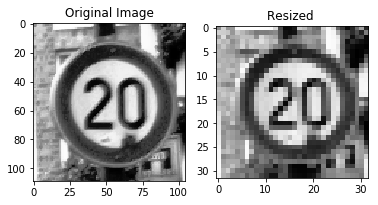

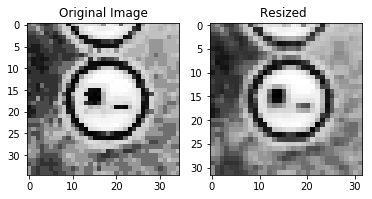

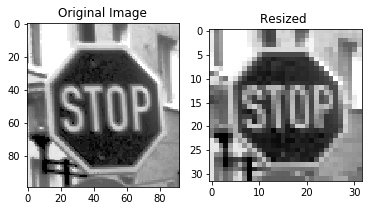

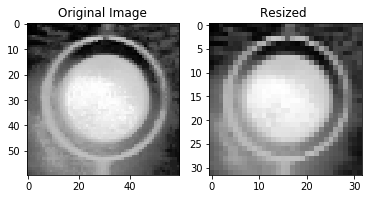

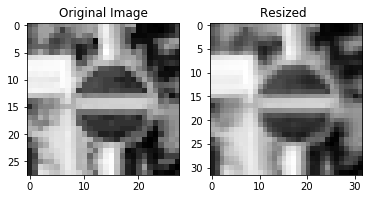

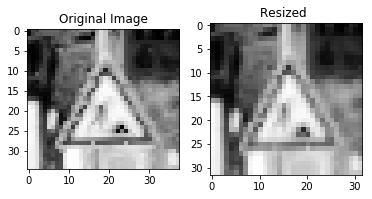

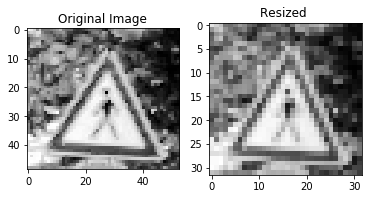

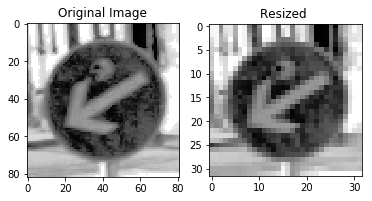

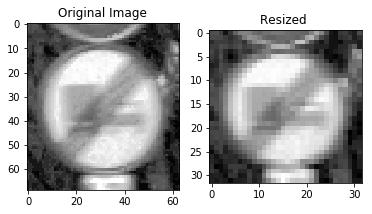

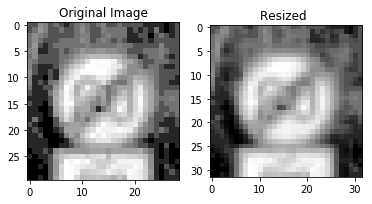

In [120]:
### Load the images and plot them here.
import os, sys
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import csv
import cv2

# Load metaData.csv file which contains the information about the test images
def collect_meta_data(meta_data_file):
    data = {};
    field_names=[]
    data_struct = {};
    
    with open(meta_data_file, 'r') as csvfile:
        is_first_row=1
        spamreader = csv.reader(csvfile, delimiter=';')
        for row in spamreader:
            if len(row) == 0:
                continue;
            # For the first row, get all the field names and store it in data 
            if is_first_row==1:
                for idx in range(len(row)):
                    data[row[idx]] = ""
                    field_names.append(row[idx]);
                is_first_row=0
            else:
                # for all other rows, make a copy of data
                # Append row values as field values in data dict 
                new_data = data.copy()
                for idx in range(len(row)):
                    new_data[field_names[idx]] = row[idx];
                data_struct[row[0]] = new_data;
    return data_struct

# Given a source folder name and file name, load image and 
# apply pre-processing algorithm to make it ready for CNN 
def load_image(source_folder, file_name):
    s="";
    parts = file_name.split("_")
    classid_info = parts[0].split("Class")
    classid = int(classid_info[1])

    sequence=(source_folder, file_name)
    file_path = s.join(sequence)
    image = cv2.imread(file_path)
    gray_image = process_image_for_nn(image)
    return gray_image, classid

# Meta data file name for the new test images from the German traffic dataset 
meta_data_file = "./test_images/metaData.csv"

# Collect metadata
meta_data= collect_meta_data(meta_data_file)

# For each image in the test images folder 
src_folder = "./test_images/"
file_list = os.listdir(src_folder)

new_X_test = []
new_y_test = []
for file in file_list:
    if str.endswith(file, ".png"):
        # Load image 
        image, classid = load_image(src_folder, file)
        
        file_parts = file.split('.')
        image_name = file_parts[0]
        
        # Load annotation 
        annotation = meta_data[image_name]
        x1, x2, y1, y2 = int(annotation['Roi.X1']), int(annotation['Roi.X2']), int(annotation['Roi.Y1']), int(annotation['Roi.Y2'])
        
        # The model is trained on uncropped images and hence the below algorithm is not required
        #print((x1,x2,y1,y2))
        #cropped_image = image[y1:y2, x1:x2]
        
        # Use the entire image for testing 
        cropped_image = image
        
        # Plot the results of pre processing on the test images 
        fig = plt.figure()
        fig, axes = plt.subplots(1, 2)
        ax = plt.subplot(1, 2, 1)
        ax.set_title("Original Image")
        plt.imshow(cropped_image[:,:,0], cmap="gray")
        
        resized_image = cv2.resize(cropped_image, (32,32))
        resized_image = resized_image[:,:, newaxis]
        
        ax = plt.subplot(1, 2, 2)
        ax.set_title("Resized ")
        plt.imshow(resized_image[:,:,0], cmap="gray")

        new_X_test.append(resized_image)
        new_y_test.append(classid)

new_X_test = np.array(new_X_test)
new_y_test = np.array(new_y_test)


### Predict the Sign Type for Each Image and Analyze Performance 

INFO:tensorflow:Restoring parameters from ./lenet
[ True  True  True  True  True  True  True  True  True  True]
Testing Accuracy: 1.0


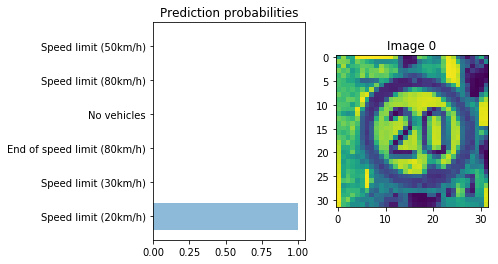

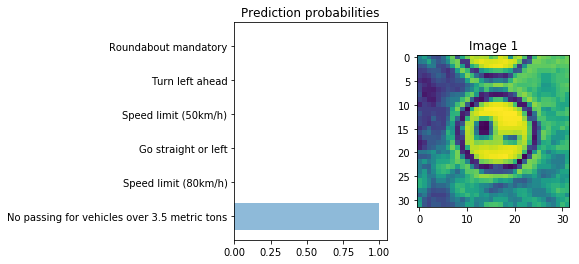

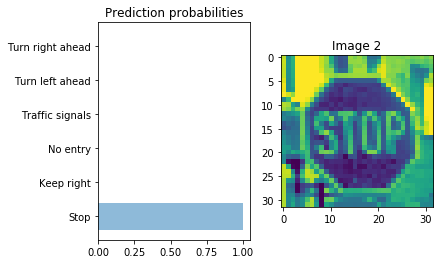

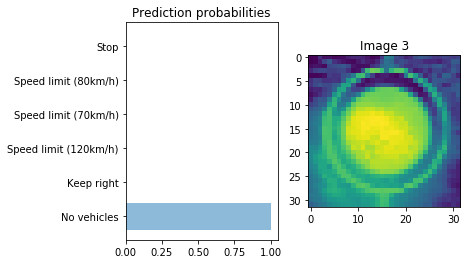

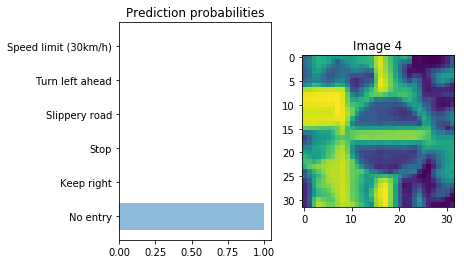

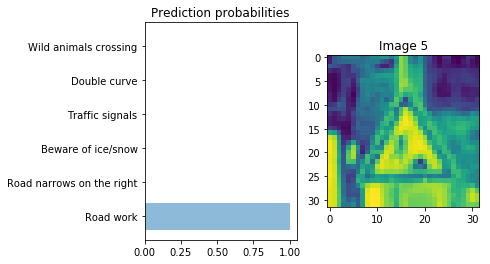

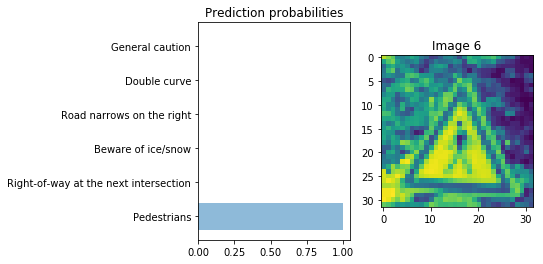

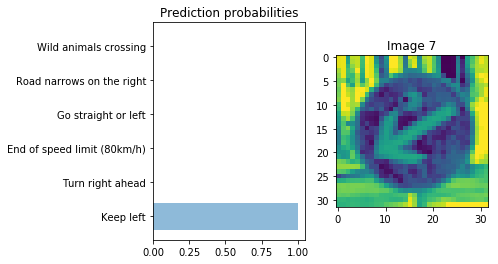

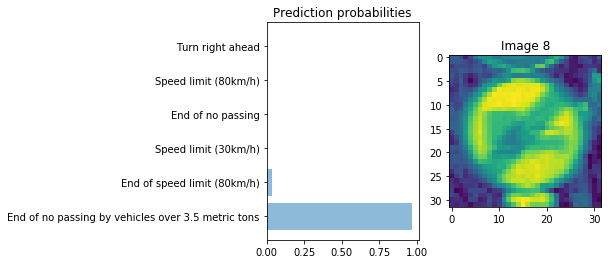

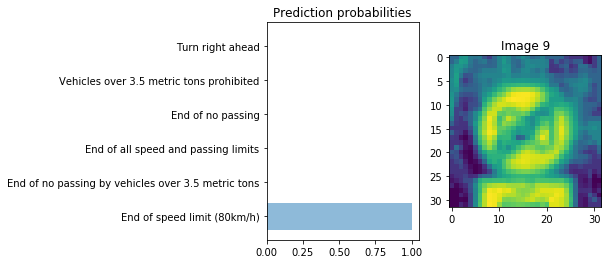

In [142]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
import tensorflow as tf
model_checkpoint = './lenet'
# Define evaluation function which takes in X and Y along with a dropout value 
# Split data into batches to run it through the accuracy operation to estimate 
# the overall performance of the model on the validation and test sets
def evaluate(X_data, y_data, dropout):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, batch_size):
        end = offset + batch_size
        batchx, batchy = X_data[offset:end], y_data[offset:end]
        
        preds  = sess.run(correct_prediction, feed_dict={x:batchx, y:batchy, keep_prob:dropout})
        print(preds)
        
        accuracy = sess.run(accuracy_operation, feed_dict={x:batchx, y:batchy, keep_prob:dropout})
        total_accuracy += (accuracy*len(batchx))
    return total_accuracy/num_examples

with tf.Session() as sess:
    # Restore the model
    tf_saver = tf.train.Saver()
    tf_saver.restore(sess, model_checkpoint)
    
    # Standard - Calculate Test Accuracy
    test_accuracy = evaluate(new_X_test, new_y_test, dropout)
    print('Testing Accuracy: {}'.format(test_accuracy))
    
    # Calculate top six classes 
    softmax_probs = tf.nn.softmax(leNet)
    top_predictions = tf.nn.top_k(softmax_probs, k=6)
    top_k_probabilities = sess.run(top_predictions, feed_dict={x:new_X_test, y:new_y_test, keep_prob:dropout})
    #print(top_k_probabilities)
    
    prob_values = top_k_probabilities[0]
    prob_classes = top_k_probabilities[1]
    
    # For each test image, plot a bar plot of probabilities used in prediction
    for idx in range(prob_values.shape[0]):
        class_indices = prob_classes[idx]
        objects = [signal_names[idy] for idy in class_indices]
        fig, axes = plt.subplots(1, 2)
        ax = plt.subplot(1, 2, 2)
        ax.set_title("Image " +  str(idx))
        modified_image = np.resize(new_X_test[idx], (32, 32))
        ax.imshow(modified_image)
        
        ax = plt.subplot(1, 2, 1)
        ax.set_title("Prediction probabilities")
        ax.barh(range(6), prob_values[idx], align='center', alpha=0.5)
        ax.set_yticks(range(6), minor=False)
        ax.set_yticklabels(objects)
    plt.show()
    
    # Compute accuracy based on top_k_predictions
    #in_top_predictions = tf.nn.in_top_k(softmax_probs, y, k=6)
    #score = sess.run(in_top_predictions, feed_dict={x:new_X_test, y:new_y_test, keep_prob:dropout})
    #print(score)

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [87]:
### Visualize your network's feature maps here.

# I have redefined the entire network to represent the model outside of a helper function, so that "outputFeatureMap" can directly use the activation functions.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry
import tensorflow as tf

def outputFeatureMap(image_input, label, dropout, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input, y: label, keep_prob: dropout})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

            
def evaluate(X_data, y_data, dropout):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, batch_size):
        end = offset + batch_size
        batchx, batchy = X_data[offset:end], y_data[offset:end]
        
        accuracy = sess.run(accuracy_operation, feed_dict={x:batchx, y:batchy, keep_prob:dropout})
        total_accuracy += (accuracy*len(batchx))
    return total_accuracy/num_examples


# Define learning_rate, dropout, epochs and batch sizes
learning_rate=0.001
dropout = 0.9
epochs = 20
batch_size=128

# Define input placeholders 
x = tf.placeholder(tf.float32, (None, 32,32,1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
keep_prob = tf.placeholder(tf.float32, (None))

mu = 0
sigma = 0.1

conv1_W = tf.Variable(tf.truncated_normal(shape=(5,5,1,6), mean=mu, stddev=sigma))
conv1_b = tf.Variable(tf.zeros(6))
conv1_c = tf.nn.conv2d(x, conv1_W, strides=[1,1,1,1], padding="VALID") +  conv1_b
conv1 = tf.nn.relu(conv1_c)
conv1 = tf.nn.max_pool(conv1, ksize=[1,2,2,1], strides=[1,2,2,1], padding="VALID")

conv2_W = tf.Variable(tf.truncated_normal(shape=(5,5,6,16), mean=mu, stddev=sigma))
conv2_b = tf.Variable(tf.zeros(16))
conv2_c = tf.nn.conv2d(conv1, conv2_W, strides=[1,1,1,1], padding="VALID") + conv2_b
conv2 = tf.nn.relu(conv2_c)
conv2 = tf.nn.max_pool(conv2, ksize=[1,2,2,1], strides=[1,2,2,1], padding="VALID")

fc0   = flatten(conv2)

fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean=mu, stddev=sigma))
fc1_b = tf.Variable(tf.zeros(120))
fc1 = tf.matmul(fc0, fc1_W) + fc1_b
fc1 = tf.nn.relu(fc1)

fc2_W = tf.Variable(tf.truncated_normal(shape=(120, 84), mean=mu, stddev=sigma))
fc2_b = tf.Variable(tf.zeros(84))
fc2 = tf.matmul(fc1, fc2_W) + fc2_b
fc2 = tf.nn.relu(fc2)
fc2 = tf.nn.dropout(fc2, dropout)

fc3_W = tf.Variable(tf.truncated_normal(shape=(84, 43), mean=mu, stddev=sigma))
fc3_b = tf.Variable(tf.zeros(43))
logits = tf.matmul(fc2, fc3_W) + fc3_b


# get logits from leNet
leNet = logits

# get the cross_entropy using training y labels
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=leNet, labels=one_hot_y)

# Define loss_operation and use it in AdamOptimizer
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_operation = optimizer.minimize(loss_operation)

# Define accuracy score using optimizer and expected y labels 
correct_prediction = tf.equal(tf.argmax(leNet, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


### Train your model here.
### Calculate and report the accuracy on the training and validation set.
saver = tf.train.Saver()
with tf.Session() as sess:
    file_writer = tf.summary.FileWriter('.', sess.graph)
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)

    for i in range(epochs):
        indices = np.arange(X_train.shape[0])
        np.random.shuffle(indices)
        X_train, y_train = X_train[indices, :,:,:], y_train[indices]
            
        for offset in range(0, num_examples, batch_size):
            end = offset + batch_size
            batchx, batchy = X_train[offset:end], y_train[offset:end]
            if batchx.shape[0] > 1:
                sess.run(training_operation, feed_dict={x:batchx, y:batchy, keep_prob:dropout})

        validation_accuracy = evaluate(X_valid, y_valid, dropout)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = " , validation_accuracy)
        print()

    saver.save(sess, './lenet_without_helper_functions')
    print("Model Saved")

EPOCH 1 ...
Validation Accuracy =  0.621502831574

EPOCH 2 ...
Validation Accuracy =  0.757332431928

EPOCH 3 ...
Validation Accuracy =  0.830360916015

EPOCH 4 ...
Validation Accuracy =  0.865353731697

EPOCH 5 ...
Validation Accuracy =  0.883357281728

EPOCH 6 ...
Validation Accuracy =  0.891133462946

EPOCH 7 ...
Validation Accuracy =  0.90507987488

EPOCH 8 ...
Validation Accuracy =  0.912940579727

EPOCH 9 ...
Validation Accuracy =  0.919448905428

EPOCH 10 ...
Validation Accuracy =  0.9277322289

Model Saved


INFO:tensorflow:Restoring parameters from ./lenet_without_helper_functions


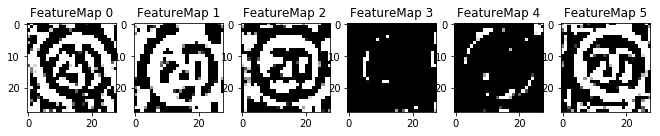

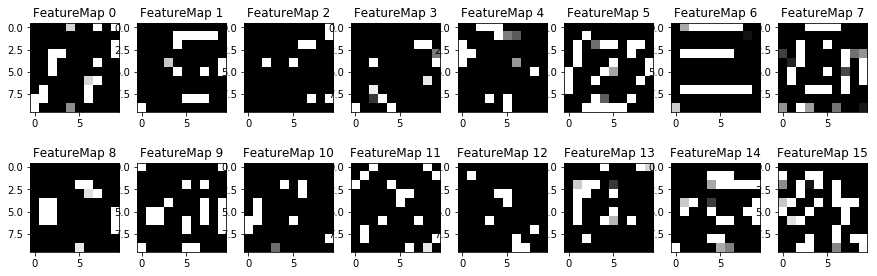

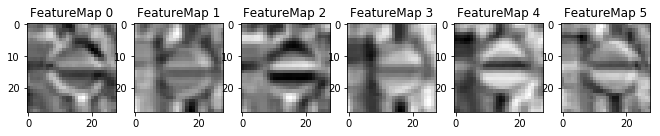

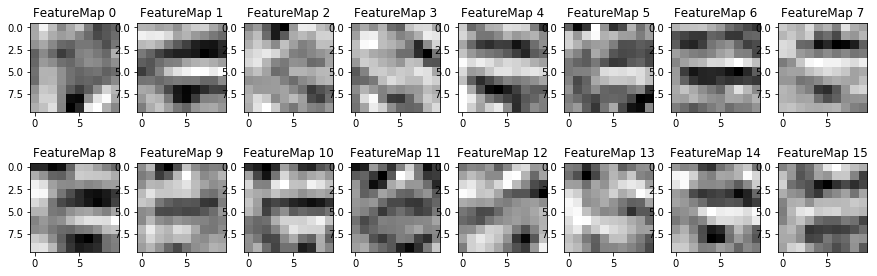

In [88]:
import tensorflow as tf
model_checkpoint = './lenet_without_helper_functions'

with tf.Session() as sess:
    # Restore the model
    tf_saver = tf.train.Saver()
    tf_saver.restore(sess, model_checkpoint)
    
    image_input = [new_X_test[0]]
    label = [new_y_test[0]]
    

    # Use different activation min and max
    outputFeatureMap(image_input, label, dropout, conv1_c, activation_min=-2, activation_max=2, plt_num=1)
    
    outputFeatureMap(image_input, label, dropout, conv2_c, activation_min=-2, activation_max=2, plt_num=2)
    
    
    image_input = [new_X_test[4]]
    label = [new_y_test[4]]

    outputFeatureMap(image_input, label, dropout, conv1_c, plt_num=3)
    
    outputFeatureMap(image_input, label, dropout, conv2_c, plt_num=4)
